### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 10
popsize = 10
generations = 500
wrap_around = True
name = 'centered8'
#device = torch.device('mps:0')
device = torch.device('cpu')
#trainer = Evo_Trainer(n, device)
trainer = Evo_Trainer(n, device, popsize)

2023-02-20 14:52:43,572	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-20 14:52:45] INFO     <19734> evotorch.core: Instance of `Custom_NEProblem` (id:4410317152) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-20 14:52:45] INFO     <19734> evotorch.core: Instance of `Custom_NEProblem` (id:4410317152) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-20 14:52:45] INFO     <19734> evotorch.core: Instance of `Custom_NEProblem` (id:4410317152) -- The `device` of the problem is set as cpu
[2023-02-20 14:52:45] INFO     <19734> evotorch.core: Instance of `Custom_NEProblem` (id:4410317152) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-20 14:52:45] INFO     <19734> evotorch.core: Instance of `Custom_NEProblem` (id:4410317152) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.9953)
    mean_eval : -186.57843017578125
  median_eval : 40.57815170288086
pop_best_eval : 199.39315795898438

         iter : 2
     stepsize : ReadOnlyTensor(0.9908)
    mean_eval : -64.30537414550781
  median_eval : 46.30594253540039
pop_best_eval : 202.785888671875

         iter : 3
     stepsize : ReadOnlyTensor(0.9865)
    mean_eval : -120.73526763916016
  median_eval : 28.208988189697266
pop_best_eval : 123.49078369140625

         iter : 4
     stepsize : ReadOnlyTensor(0.9823)
    mean_eval : -204.16542053222656
  median_eval : 25.876869201660156
pop_best_eval : 281.65643310546875

         iter : 5
     stepsize : ReadOnlyTensor(0.9784)
    mean_eval : -134.95704650878906
  median_eval : 26.688316345214844
pop_best_eval : 287.83251953125

         iter : 6
     stepsize : ReadOnlyTensor(0.9745)
    mean_eval : -82.97208404541016
  median_eval : 53.22434997558594
pop_best_eval : 399.80889892578125

         iter : 7
     ste

In [4]:
network = trainer.get_trained_network()

In [5]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])

#### Visualize trained network

In [6]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer(wrap_around)
network(graph, 0)

(Data(x=[30, 10], edge_index=[1, 0], device=cpu, attr=[1]),
 tensor([0., 0.]),
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0)

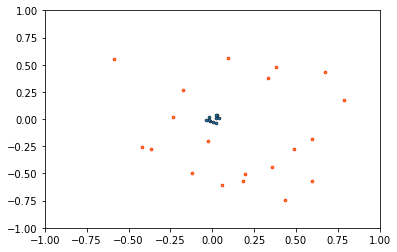

In [7]:
anim = visualizer.animate_organism(graph, network, food=30, frames=100)
visualizer.save_animation_to_gif(anim, name, 10)

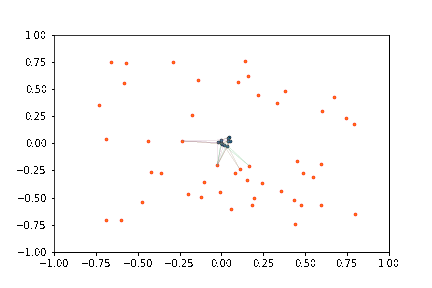

In [8]:
Image('../animation/' + name + '.gif')

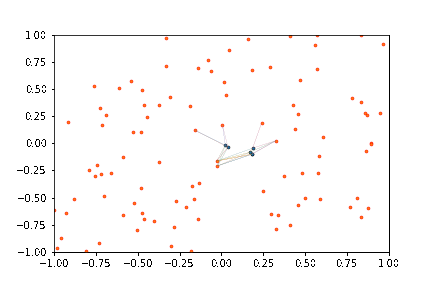

In [9]:
Image('../animation/GATConv1.gif')

In [10]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [11]:
print(network)

CGConv1(
  (conv_layer_cells): CGConv(10, dim=4)
  (conv_layer_food): CGConv(10, dim=4)
  (mlp): Sequential(
    (0): ReLU()
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): ReLU()
    (3): Linear(in_features=20, out_features=7, bias=True)
    (4): Tanh()
  )
  (mlp_before): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
)


In [12]:
print('conv_layers1: ', network.conv_layer_cells)
for param in network.conv_layer_cells.parameters():
  print(param.data)

print('conv_layers2: ', network.conv_layer_food)
for param in network.conv_layer_food.parameters():
  print(param.data)

conv_layers1:  CGConv(10, dim=4)
tensor([[-1.1244e-01, -4.0620e-01,  9.5778e-02, -5.1667e-01,  5.5044e-01,
          1.0870e+00,  9.8522e-01,  1.1277e+00,  6.7788e-01, -1.9438e+00,
          2.0284e+00, -8.3978e-01,  5.2108e-02,  5.8755e-01, -1.4990e+00,
          5.9195e-01, -1.1867e+00, -4.0278e-01, -7.9510e-01,  1.1364e+00,
          6.4356e-01, -1.4367e-01, -1.0102e-01,  3.5987e-01],
        [ 1.6594e+00,  1.5652e+00,  2.8391e-02, -2.1360e+00,  1.0543e+00,
         -9.3333e-01,  1.7515e-01,  1.2851e-02, -1.8343e+00, -3.8402e-01,
          4.7864e-01,  1.5801e+00, -5.9088e-01,  7.3140e-02, -6.9594e-01,
         -8.9206e-01, -1.3119e-02, -8.7116e-01, -1.2292e+00,  1.0342e+00,
         -1.0896e+00, -2.5625e-02,  5.1466e-01,  6.2901e-02],
        [-3.1162e+00, -1.0439e-01, -1.2998e+00,  9.1713e-02,  4.2839e-01,
         -2.1128e+00, -2.0950e-01,  3.4480e-01, -1.6978e-01,  2.0456e+00,
         -1.6523e+00, -1.5999e+00,  6.6416e-01, -8.5324e-01,  2.7690e-01,
         -8.6899e-01, -1.1215

In [13]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

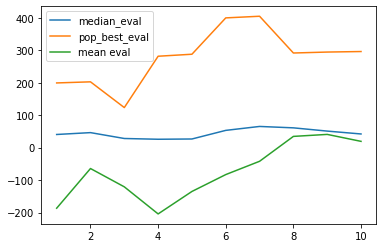

In [14]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
#plt.plot(losses.stepsize)
plt.plot(losses.median_eval)
plt.plot(losses.pop_best_eval)
plt.plot(losses.mean_eval)
plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()